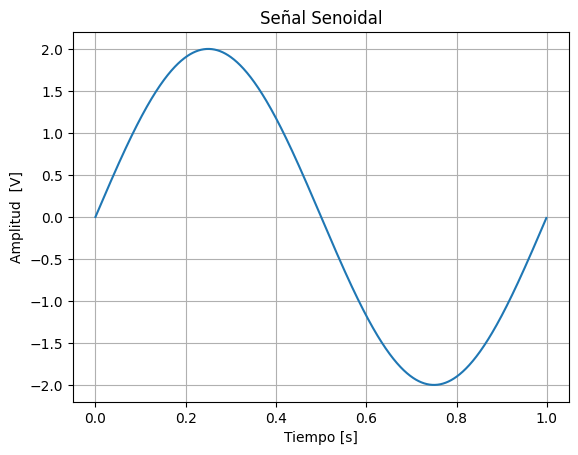

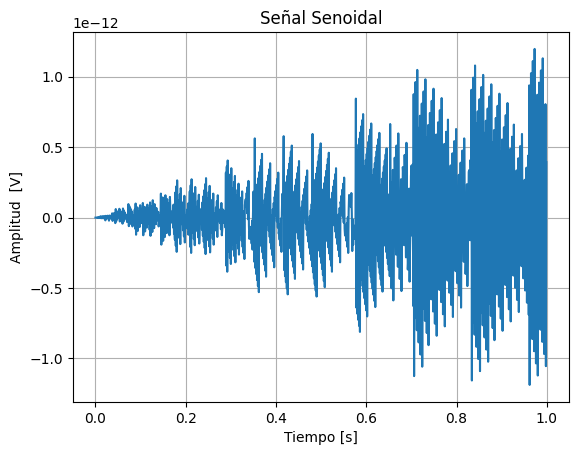

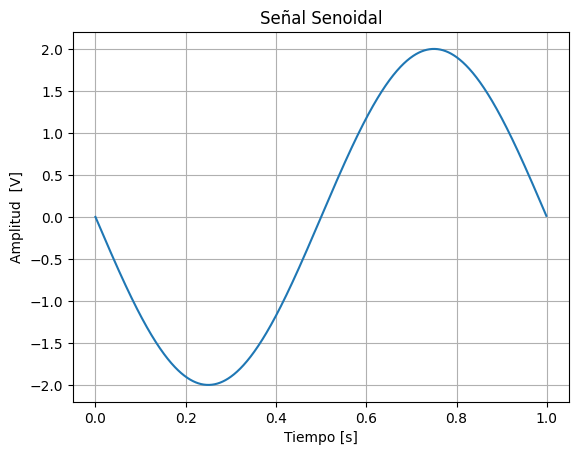

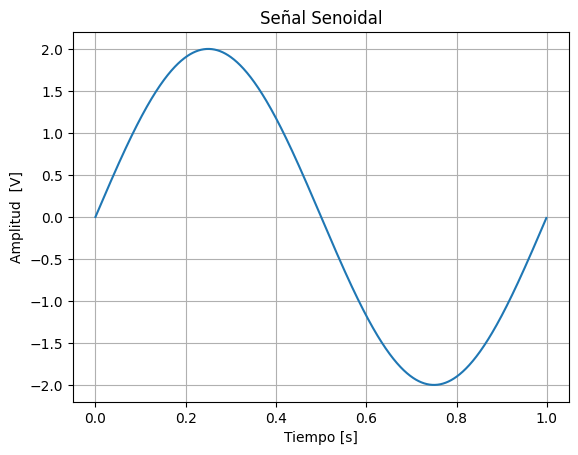

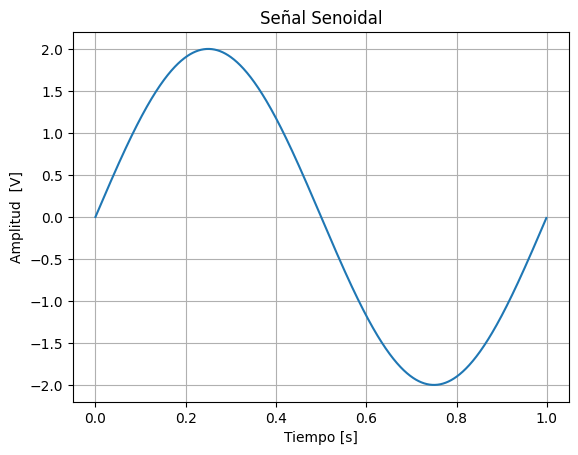

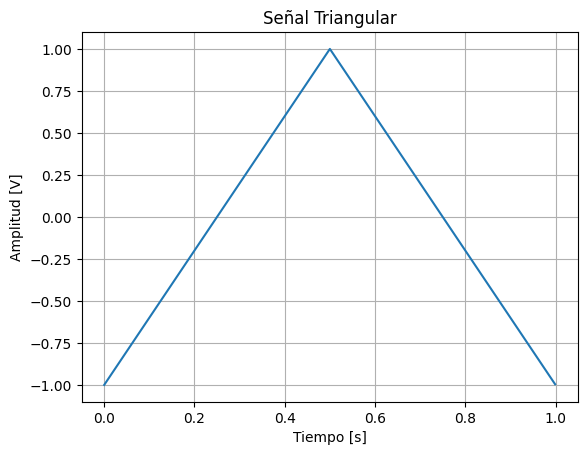

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed March 12 2025

@author: Valentina Aramayo

Descripción:
------------

    Generador de señales: Senoidales
    En este programa vamos a parametrizar y llamar a una función "funcion_senoidal"
    Luego, se realizarán pruebas com distintas frecuencias f0 (en este código ff)
    Finalmente, se implementará una señal triangular
"""
#%% Importo los módulos y bibliotecas que voy a utilizar
import numpy as np # La uso para realizar operaciones matemáticas como el seno y para hacer la linea de tiempo tt
import matplotlib.pyplot as plt # La uso para imprimir el gráfico del seno
from scipy.signal import sawtooth # Importar señal triangular

#%% Defino la función funcion_senoidal
def funcion_senoidal(vmax,dc,ff,ph,nn,fs): 
  # funcion_senoidal(vMax,vDc,frec,fase,#_muestras,frec_muestreo)
    ts = 1/fs # tiempo de muestreo
    df = fs/nn # resolución espectral
    
    # grilla de sampleo temporal
    tt = np.linspace(0, (nn-1)*ts, nn).flatten()
    # otra forma: tt = np.arange(start = 0, stop = T_simulacion, step = Ts)
   
    xx = vmax * np.sin( 2 * np.pi * ff * tt + ph ) + dc
    plt.figure()
    plt.plot(tt,xx,)
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud  [V]')
    plt.title('Señal Senoidal')
    plt.grid()
    plt.show()
    return tt, xx  

#%% Defino la función funcion_triangular
def funcion_triangular(vmax,dc,ff,ph,nn,fs): 
  # funcion_senoidal(vMax,vDc,frec,fase,#_muestras,frec_muestreo)
    ts = 1/fs # tiempo de muestreo
    df = fs/nn # resolución espectral
    
    # grilla de sampleo temporal
    tt = np.linspace(0, (nn-1)*ts, nn).flatten()
    # otra forma: tt = np.arange(start = 0, stop = T_simulacion, step = Ts)
   
    xx = vmax * sawtooth(2 * np.pi * ff * tt + ph, width=0.5) + dc
    plt.figure()
    plt.plot(tt,xx,)
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud [V]')
    plt.title('Señal Triangular')
    plt.grid()
    plt.show()
    return tt, xx  
#%% Parámetros fs y N
fs = 1000.0 # frecuencia de muestreo (Hz)
N = 1000   # cantidad de muestras
#%% Experimento 1

tt, xx = funcion_senoidal (vmax = 2, dc = 0, ff = 1, ph=0, nn = N, fs = fs)

#%% Experimento 2

tt, xx = funcion_senoidal (vmax = 2, dc = 0, ff = 500, ph=0, nn = N, fs = fs)
#%% Experimento 3

tt, xx = funcion_senoidal (vmax = 2, dc = 0, ff = 999, ph=0, nn = N, fs = fs)
#%% Experimento 4

tt, xx = funcion_senoidal (vmax = 2, dc = 0, ff = 1001, ph=0, nn = N, fs = fs)
#%% Experimento 5

tt, xx = funcion_senoidal (vmax = 2, dc = 0, ff = 2001, ph=0, nn = N, fs = fs)
#%% Otra señal
tt, xx = funcion_triangular (vmax = 1, dc = 0, ff =1, ph=0, nn = N, fs = fs)



# Análisis #
Partamos de la base de que sabemos que para lograr reconstruir un señal de forma fidedigna (al menos en frecuencia) es necesario muestrear con más del doble de la frecuencia de la señal original (frecuencia de Nyquist). Así se logrará una reconstrucción fidedigna. En el caso del muestro de la señal con frecuencia de 1 Hz requeririamos tomar almenos dos muestras por segundo. Como en este caso la tasa de muestreo es de 1000 muestras por segundo entonces lograremos una buena representación de la señal por la cantidad de muestras tomadas.

En el caso de la señal con frecuencia de 500Hz, no se logra reconstruir de manera fidedigna la señal. De hecho no se logra distinguir de que señal se trata. Esto se debe a que se esta muestreando a la frecuencia de Nyquist (Fn=2(500Hz)). Muestrear exactamente a la frecuencia de Nyquist puede causar problemas de representación de la señal, ya que no se tienen suficientes datos para reconstruirla correctamente.

Luego, para la señales de frecuencias de 1001 y 2001 Hz observamos que hay una ambigüedad ya que aparentan ser una señal de 1 Hz, esto es lo que se conoce como efecto alias. Esto se debe a que la frecuencia de muestreo es menor a la frecuencia de nyquist. Ademas, el aliasing hace que frecuencias mayores a 500 Hz se reflejen en el espectro eso es lo que ocurre para para la señal de 999Hz , la señal se ve como si fuera una de 1 Hz, pero invertida.
Esto puede observarse claramente en el gráfico siguiente


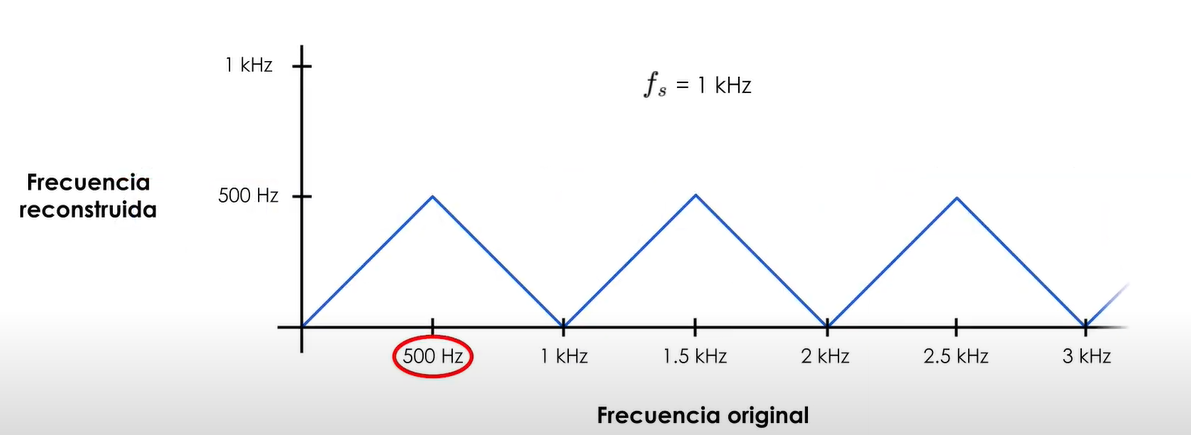